# Predicting activators of TTR transcripption using 13C NMR spectroscopy data without PCA

## Content   <a name="content"></a>

1. [Upload and analyse TTR 13C NMR spectroscopy data](#1)
2. [Create a dataframe merging the C13and H1 NMR data frames to the data frame holding the labels](#2)
3. [Ensure an equal number of classes in the test sets](#3)
4. [Balancing](#4)
5. [Machine Learning](#5)
6. [Cross-validation ](#6)
7. [Scrutinise for overfitting of the MLmodel with default hyperparameter values (kernel='rbf', C=1.0, gamma=’scale’)](#7)
8. [Hyperparameter tuning wth Optuna ](#8)
9. [Scrutinise for overfitting of the ML model hyperparameter tuned by Optuna](#9)

## Upload and analyse TTR 13C NMR spectroscopy data <a name="1"></a>

In [1]:
import pandas as pd 

# load the converted nmr dataset
df_C13 = pd.read_csv('output_C13.csv')

# To avoid truncation of some columns during data frame display
pd.set_option('display.max_columns', None) 

# Display the data frame
print('Shape of df_C13: ', df_C13.shape)
df_C13.head()

Shape of df_C13:  (3177, 301)


,SMILES,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,CC1=C(C=C(C=C1)Cl)NC(C#N)C2=CC=CC=C2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2,1,2,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,C1CCC(CC1)CNC(=O)COC(=O)C2=CC=C(C=C2)F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,C1=CSC(=C1)C(=O)NNC(=O)C2=CC=C(C=C2)F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CC1=CC(=CC=C1)C(=O)NC2=C(C=NN2C3=CC=CC=C3)C(=O...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,1,2,0,0,0,1,0,0,1,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,COC(=O)C1=CC=C(C=C1)NC2=C(C3=NON=C3C=C2)[N+](=...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,1,0,

In [2]:
# Identify columns with only zeros
columns_to_drop = df_C13.columns[df_C13.eq(0).all()]

In [3]:
# Drop the columns
df_C13 = df_C13.drop(columns_to_drop, axis=1)

In [4]:
# Display the data frame
print('Shape of df_C13: ', df_C13.shape)
df_C13.head()

Shape of df_C13:  (3177, 209)


,SMILES,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,210,211,222
0,CC1=C(C=C(C=C1)Cl)NC(C#N)C2=CC=CC=C2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2,1,2,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,C1CCC(CC1)CNC(=O)COC(=O)C2=CC=C(C=C2)F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,C1=CSC(=C1)C(=O)NNC(=O)C2=CC=C(C=C2)F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CC1=CC(=CC=C1)C(=O)NC2=C(C=NN2C3=CC=CC=C3)C(=O...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,1,2,0,0,0,1,0,0,1,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,COC(=O)C1=CC=C(C=C1)NC2=C(C3=NON=C3C=C2)[N+](=...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


[<a href="#content">Back to top</a>]

## Create a dataframe merging the NMR data frame to the data frame holding the labels  <a name="2"></a>

In [5]:
# load the dataset with targets
df_targets = pd.read_csv('input/targets.csv')

# Display the data frame
print('Shape of df_targets: ', df_targets.shape)
df_targets.head()

Shape of df_targets:  (3177, 2)


,SMILES,target
0,C1CN(CCC1(C#N)NC2=CC=CC=C2)CC3=CC=CC=C3,0
1,CC1=C(C=C(C=C1)[N+](=O)[O-])S(=O)(=O)NC2=CC=C(...,0
2,C1=CC=C2C(=C1)C(=CC(=N2)C3=CN=CC=C3)C(=O)NN=CC...,0
3,CC(C)N(CC1=CC=CC=C1)C(=S)NC2=CN=CC=C2,0
4,C1=CC=C(C(=C1)C(=O)NNC(=O)C2=CC=CC=C2[N+](=O)[...,0


In [6]:
# Merge the target and nmr data 
df = pd.merge( df_C13, df_targets, on='SMILES', how='inner')

In [7]:
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (3177, 210)


,SMILES,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,210,211,222,target
0,CC1=C(C=C(C=C1)Cl)NC(C#N)C2=CC=CC=C2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2,1,2,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,C1CCC(CC1)CNC(=O)COC(=O)C2=CC=C(C=C2)F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,C1=CSC(=C1)C(=O)NNC(=O)C2=CC=C(C=C2)F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CC1=CC(=CC=C1)C(=O)NC2=C(C=NN2C3=CC=CC=C3)C(=O...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,1,2,0,0,0,1,0,0,1,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,COC(=O)C1=CC=C(C=C1)NC2=C(C3=NON=C3C=C2)[N+](=...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3177 entries, 0 to 3176
Columns: 210 entries, SMILES to target
dtypes: int64(209), object(1)
memory usage: 5.1+ MB


In [9]:
df.drop(columns=['SMILES'], axis=1, inplace=True)

In [10]:
unique_count = df['target'].unique()
print("The unique values in column 'target:", unique_count)

The unique values in column 'target: [0 1]


In [11]:
# # Drop rows with any NaN values
df = df.dropna()

In [12]:
# Count each of the binary targets
df['target'].value_counts()

target
0    2023
1    1154
Name: count, dtype: int64

[<a href="#content">Back to top</a>]

## Ensure an equal number of classes in the test sets <a name="3"></a>

In [13]:
# Handle the part of target 1 in the test set 
df_1 = df[df['target']==1]

# Shuffle the resulting data set
df_1 = df_1.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract 2800 samples (10% of 28000 samples) of target 1 for the test set
df_1_test = df_1.iloc[:340]

# Assign the rest of target 1 for the train set
df_1_train = df_1.iloc[340:]

In [14]:
# Handle the part of target 0 in the test set 
df_0 = df[df['target']==0]

# Shuffle the resulting data set
df_0 = df_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

## Extract 2800 samples (10% of 28000 samples) of target 0 for the test set Extract 10% of target 1 for the test set
df_0_test = df_0.iloc[:340]

# Assign the rest of target 1 for the train set
df_0_train = df_0.iloc[340:]

In [15]:
# Create train and test dataframe for further manipulation 
train = pd.concat([df_0_train, df_1_train])
test = pd.concat([df_0_test, df_1_test])

In [16]:
# Create the sets for ML 
X_train = train.drop(columns='target' , axis=1)
y_train = train['target']

X_test =  test.drop(columns='target' , axis=1)
y_test = test['target']

In [17]:
# Create X and y datasets to use for cross-validation
X = pd.concat([X_train, X_test]) 
y = pd.concat([y_train, y_test]) 

In [18]:
# Check the number of classes in the y_test set
y_test.value_counts()

target
0    340
1    340
Name: count, dtype: int64

In [19]:
# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (2497, 208)
X_test:   (680, 208)
y_train:  (2497,)
y_test:   (680,)


[<a href="#content">Back to top</a>]

## Balancing <a name="4"></a>

[(0, 1683), (1, 814)]


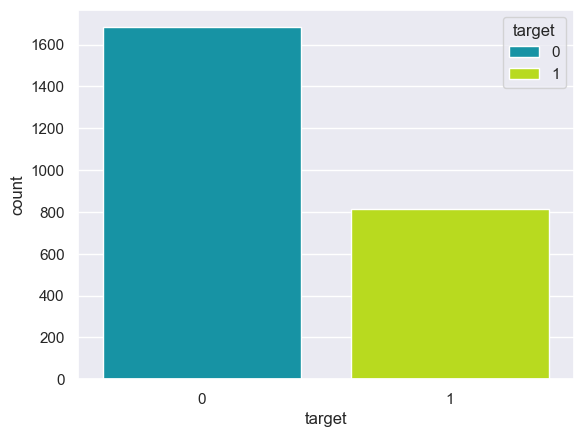

In [20]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Plot the imbalance between the targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train, palette='nipy_spectral')
plt.show()

In [21]:
# pip install --upgrade imbalanced-learn

[(0, 1683), (1, 1683)]


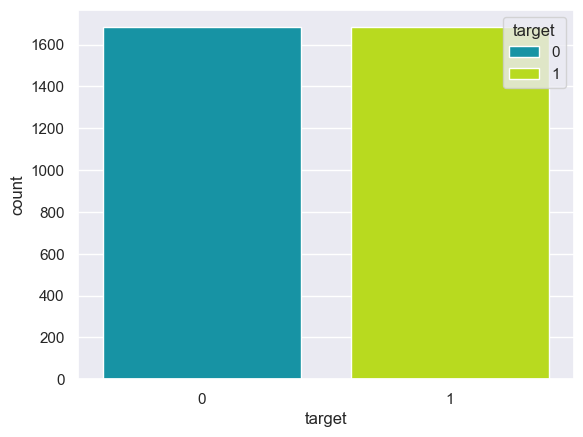

In [22]:
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# Balance targets with over sampling
# smote = SMOTE(random_state=0)
ros = RandomOverSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

# Plot the balance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train,palette='nipy_spectral')
plt.show()

In [23]:
# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (3366, 208)
X_test:   (680, 208)
y_train:  (3366,)
y_test:   (680,)


[<a href="#content">Back to top</a>]

## Machine Learning <a name="5"></a>

In [24]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the algorithms that will be used, placing them in a dictionary 
clfs = {"SVM":SVC(),
        "Decision":DecisionTreeClassifier(), 
        "RandomForest":RandomForestClassifier(), 
        "GradientBoost":GradientBoostingClassifier(),
        # "XGBoost":XGBClassifier(verbosity=0),
       "K-nearest": KNeighborsClassifier(n_neighbors=3)}

In [25]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Create statistics with the results of training with different algorithms
def model_fit(clfs):
    fitted_model={}
    model_result = pd.DataFrame()
    # Iterate the clfs dictionary clfs
    for model_name, model in clfs.items():
        # Train the current model
        model.fit(X_train,y_train)
        # Add the current model name
        fitted_model.update({model_name:model})
        # Prediction of the current model 
        y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        # Calculate the metrics
        model_dict['2.Accuracy'] = round(accuracy_score(y_test, y_pred),3)
        model_dict['3.Precision'] = round(precision_score(y_test, y_pred),3)
        model_dict['4.Recall'] = round(recall_score(y_test, y_pred),3)
        model_dict['5.F1'] = round(f1_score(y_test, y_pred),3)
        model_dict['6.ROC'] = round(roc_auc_score(y_test, y_pred),3)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

# Run the function model_fit(clfs) 
fitted_model, model_result = model_fit(clfs)

# Display the results of the model_fit(clfs) function in a descending order
model_result.sort_values(by=['2.Accuracy'],ascending=False)

,1.Algorithm,2.Accuracy,3.Precision,4.Recall,5.F1,6.ROC
3,GradientBoost,0.568,0.592,0.435,0.502,0.568
0,SVM,0.560,0.596,0.374,0.459,0.560
4,K-nearest,0.550,0.596,0.312,0.409,0.550
2,RandomForest,0.538,0.691,0.138,0.230,0.538
1,Decision,0.521,0.527,0.403,0.457,0.521


[<a href="#content">Back to top</a>]

## Five-fold cross-validation  <a name="6"></a>

In [26]:
# Cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

# Create statistics with the results of the cross-validation of different estimators
def model_CV(clfs):
    estimated_model={}
    model_cv_result = pd.DataFrame()
    for model_name, model in clfs.items():
        estimated_model.update({model_name:model})
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.Mean CV Score'] = round(scores.mean(), 4)
        model_dict['3.Standard Deviation'] = round(scores.std(), 4)
        model_dict['4.List of CV Scores'] = np.round(scores, 4)
        model_cv_result = model_cv_result._append(model_dict,ignore_index=True)
    return estimated_model, model_cv_result

# Run the model_CV(clsf) function
estimated_model, model_cv_result = model_CV(clfs)

# Display the results of cross_validation statistics in a descending order
model_cv_result.sort_values(by=['2.Mean CV Score'],ascending=False)

,1.Algorithm,2.Mean CV Score,3.Standard Deviation,4.List of CV Scores
2,RandomForest,0.8637,0.0612,"[0.7923, 0.8039, 0.8559, 0.9465, 0.9198]"
1,Decision,0.7573,0.0352,"[0.7285, 0.7221, 0.737, 0.8083, 0.7905]"
0,SVM,0.7288,0.0307,"[0.6899, 0.7043, 0.7311, 0.7786, 0.74]"
4,K-nearest,0.6875,0.0431,"[0.6543, 0.6256, 0.6895, 0.7355, 0.7325]"
3,GradientBoost,0.6509,0.0195,"[0.6365, 0.6627, 0.6196, 0.6686, 0.6672]"


[<a href="#content">Back to top</a>]

## Scrutinise for overfitting of the ML model with default features <a name="7"></a>

In [27]:
import matplotlib.pyplot as plt

# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = GradientBoostingClassifier(max_depth=i)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.628, test: 0.549
>2, train: 0.701, test: 0.566
>3, train: 0.775, test: 0.568
>4, train: 0.822, test: 0.547
>5, train: 0.880, test: 0.549
>6, train: 0.917, test: 0.563
>7, train: 0.953, test: 0.510
>8, train: 0.960, test: 0.557
>9, train: 0.980, test: 0.549
>10, train: 0.994, test: 0.532
>11, train: 0.993, test: 0.531
>12, train: 0.996, test: 0.512
>13, train: 0.998, test: 0.532
>14, train: 0.999, test: 0.550
>15, train: 0.999, test: 0.529
>16, train: 1.000, test: 0.531
>17, train: 1.000, test: 0.522
>18, train: 1.000, test: 0.524
>19, train: 1.000, test: 0.537
>20, train: 1.000, test: 0.525


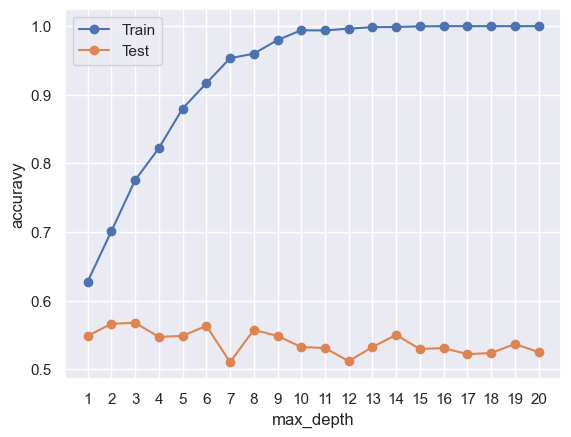

In [28]:
import math
import matplotlib.pyplot as plt

# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]

## Hyperparameter tuning with Optuna <a name="8"></a>

In [29]:
# pip install --upgrade scikit-learn

In [30]:
import optuna

def objective(trial):
    """
    Objective function for Optuna hyperparameter tuning.

    Args:
        trial: An Optuna trial object.

    Returns:
        The negative accuracy score (to be minimized).
    """
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200), 
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True), 
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
    }

    model = GradientBoostingClassifier(**params, random_state=42) 
    accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return -accuracy  # Optuna minimizes the objective function

# Create a study object
study = optuna.create_study(direction='minimize')

# Run the optimization
study.optimize(objective, n_trials=100)  # Adjust n_trials as needed

# Get the best hyperparameters
best_params = study.best_params

# Train the model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
print(f"Best Accuracy: {accuracy}")
print(f"Best Hyperparameters: {best_params}")

[I 2025-05-13 15:05:18,492] A new study created in memory with name: no-name-1f6845aa-e644-499b-ac25-4d6fd81c3deb
[I 2025-05-13 15:05:22,238] Trial 0 finished with value: -0.6004149011688662 and parameters: {'n_estimators': 88, 'learning_rate': 0.01648750603134562, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 0 with value: -0.6004149011688662.
[I 2025-05-13 15:05:26,263] Trial 1 finished with value: -0.6360699467815397 and parameters: {'n_estimators': 95, 'learning_rate': 0.05414572318994898, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 1 with value: -0.6360699467815397.
[I 2025-05-13 15:05:31,290] Trial 2 finished with value: -0.6271564058359531 and parameters: {'n_estimators': 122, 'learning_rate': 0.03143741000105007, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 4}. Best is trial 1 with value: -0.6360699467815397.
[I 2025-05-13 15:05:52,493] Trial 3 finished with value: -0.8300827597761915 and parame

Best Accuracy: 0.55
Best Hyperparameters: {'n_estimators': 140, 'learning_rate': 0.2707978904314563, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 3}


[<a href="#content">Back to top</a>]

## Scrutinise for overfitting of the ML model hyperparameter tuned by Optuna <a name="9"></a>

In [34]:
# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = GradientBoostingClassifier(max_depth=i, 
                                    n_estimators = 140,
                                    learning_rate = 0.2707978904314563, 
                                    min_samples_split = 4, 
                                    min_samples_leaf = 3)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.681, test: 0.554
>2, train: 0.788, test: 0.571
>3, train: 0.872, test: 0.563
>4, train: 0.925, test: 0.553
>5, train: 0.969, test: 0.550
>6, train: 0.989, test: 0.549
>7, train: 0.998, test: 0.547
>8, train: 0.999, test: 0.525
>9, train: 1.000, test: 0.538
>10, train: 1.000, test: 0.541
>11, train: 1.000, test: 0.550
>12, train: 1.000, test: 0.551
>13, train: 1.000, test: 0.544
>14, train: 1.000, test: 0.524
>15, train: 1.000, test: 0.546
>16, train: 1.000, test: 0.528
>17, train: 1.000, test: 0.532
>18, train: 1.000, test: 0.538
>19, train: 1.000, test: 0.546
>20, train: 1.000, test: 0.515


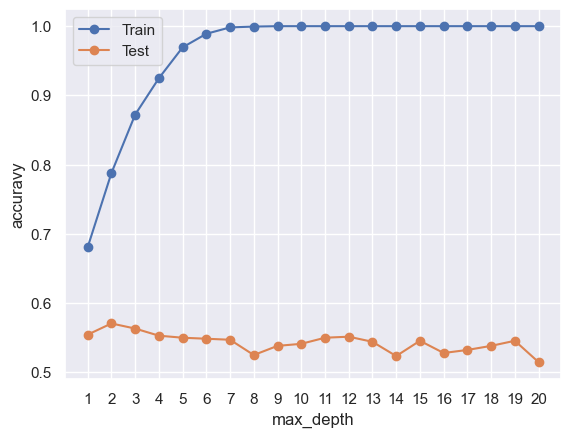

In [35]:
# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]